Анализ структуры обучения

In [14]:
import os

# Проверка текущей рабочей директории
print(os.getcwd())



d:\xampp\htdocs\PYTHON


## Лекции


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка файла лекций
lectures_df = pd.read_csv('./lectures.csv')

total_amount_lectures = lectures_df['lecture_id'].nunique()
# Подсчет количества уникальных тегов (tag)
unique_tags = lectures_df['tag'].nunique()
print(f'Количество уникальных тегов: {unique_tags}')

# Поиск самого частого тега (tag)
most_common_tag = lectures_df['tag'].value_counts().idxmax()
print(f'Самый частый тег: {most_common_tag}')

# Подсчет количества лекций по тегам (tag)
tag_counts = lectures_df['tag'].value_counts()

# Подсчет количества уникальных категорий лекций (part)
unique_parts = lectures_df['part'].nunique()
print(f'Количество уникальных категорий лекций (part): {unique_parts}')

# Перечисление уникальных категорий лекций (part)
unique_parts_list = lectures_df['part'].unique()
print(f'Уникальные категории лекций (part): {unique_parts_list}')

# Подсчет количества уникальных элементов с определенным значением part
part_value = 1  # Здесь можно указать нужное значение part
unique_elements_for_part = lectures_df[lectures_df['part'] == part_value]['lecture_id'].nunique()
print(f'Количество уникальных элементов для part = {part_value}: {unique_elements_for_part}')

# Поиск самой частой части TOEIC test
most_common_part = lectures_df['part'].value_counts().idxmax()
most_common_part_count = lectures_df['part'].value_counts().max()
print(f'Самая частая часть TOEIC test: part {most_common_part} (встречается {most_common_part_count} раз)')

# Подсчет количества лекций по категориям (part)
part_counts = lectures_df['part'].value_counts().sort_index()
colors = plt.cm.Paired.colors

unique_type_of = lectures_df['type_of'].nunique()
part_type_of = lectures_df['type_of'].value_counts()



Количество уникальных тегов: 151
Самый частый тег: 136
Количество уникальных категорий лекций (part): 7
Уникальные категории лекций (part): [5 1 6 2 7 3 4]
Количество уникальных элементов для part = 1: 54
Самая частая часть TOEIC test: part 5 (встречается 143 раз)


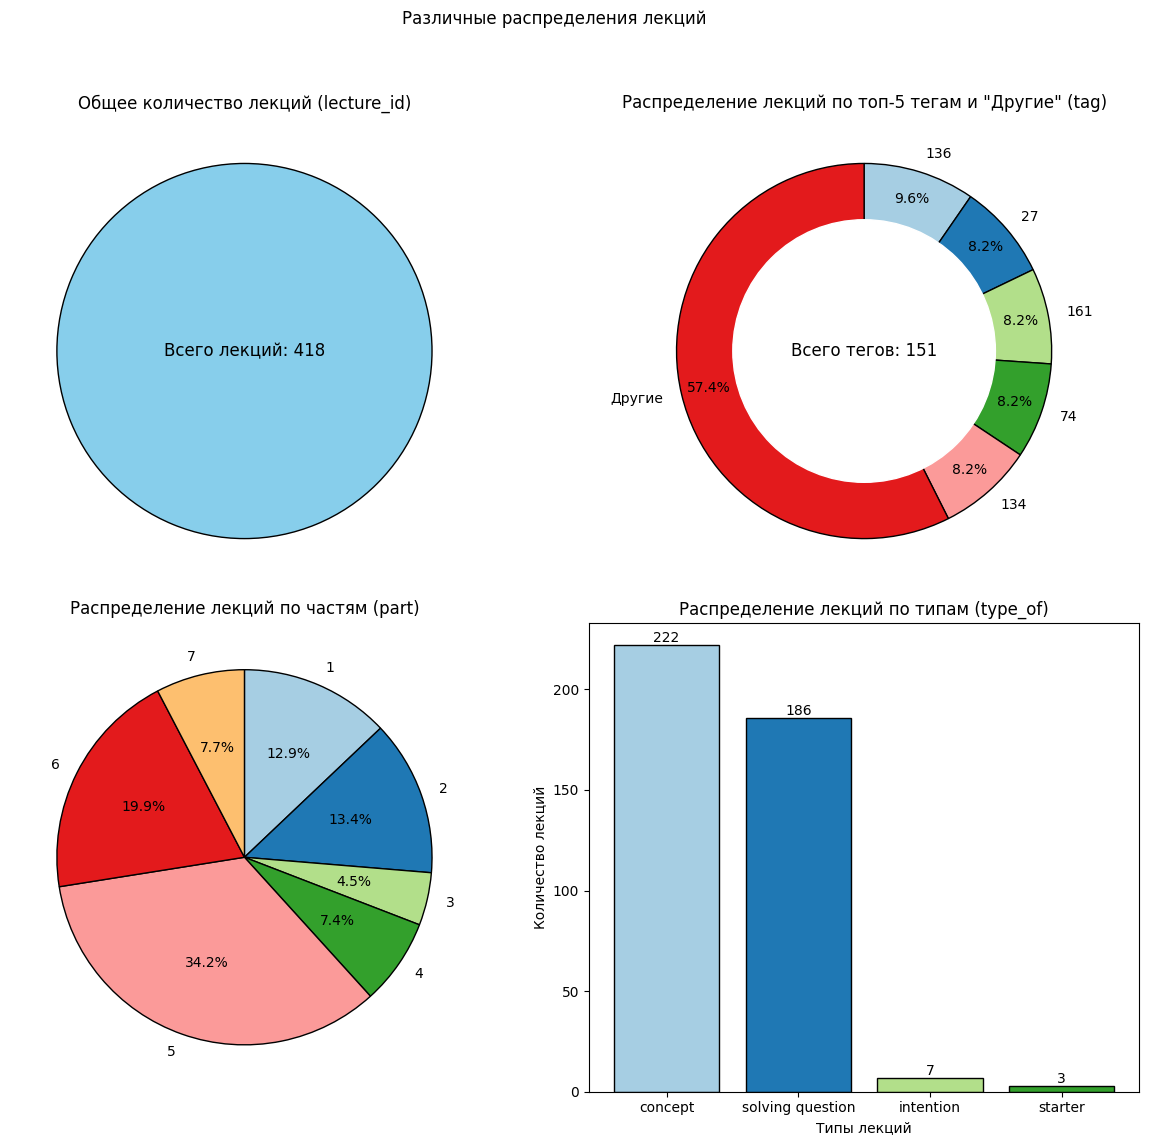

In [141]:
# Построение четырех диаграмм на одной фигуре
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}

axes[0].pie([1], colors=['skyblue'], wedgeprops=wedgeprops)
axes[0].text(0, 0, f'Всего лекций: {total_amount_lectures}', horizontalalignment='center', verticalalignment='center', fontsize=12)
axes[0].set_title('Общее количество лекций (lecture_id)')

# Первый график - пончиковая диаграмма по тегам (топ-5 тегов + другие)
tag_counts_top5 = tag_counts.head(5)
other_tags_count = min(tag_counts.iloc[5:].sum(), tag_counts.sum() * 0.10)
tag_counts_top5['Другие'] = other_tags_count
axes[1].pie(tag_counts_top5.values, labels=tag_counts_top5.index, autopct='%1.1f%%', startangle=90, colors=colors, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.85)
axes[1].add_artist(plt.Circle((0, 0), 0.70, color='white'))
axes[1].text(0, 0, f'Всего тегов: {unique_tags}', horizontalalignment='center', verticalalignment='center', fontsize=12)
axes[1].set_title(f'Распределение лекций по топ-5 тегам и "Другие" (tag)')

# Второй график - круговая диаграмма по категориям (part)
axes[2].pie(part_counts.values, labels=part_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, counterclock=False, wedgeprops=wedgeprops)
axes[2].set_title('Распределение лекций по частям (part)')

# Третий график - диаграмма по типам лекций (type_of)
bars = axes[3].bar(part_type_of.index, part_type_of.values, color=colors, edgecolor='black')
axes[3].set_xlabel('Типы лекций')
axes[3].set_ylabel('Количество лекций')
axes[3].set_title(f'Распределение лекций по типам (type_of)')

# Добавление значений на бары
for bar in bars:
    height = bar.get_height()
    axes[3].text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Различные распределения лекций')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Вопросы 

In [202]:
# Загрузка файла лекций с использованием относительного пути
questions_df = pd.read_csv('./questions.csv')
unique_questions = questions_df['question_id'].nunique()

print(f'Количество уникальных вопросов: {unique_questions}')

unique_bundle = questions_df['bundle_id'].nunique()
print(f'Количество уникальных bundle_id: {unique_bundle}')

unique_part = questions_df['part'].nunique()
unique_part_list = questions_df['part'].value_counts()
print(f'Количество уникальных part: {unique_part}')

# Разделение значений столбца 'tags' и создание списка всех тегов
questions_df['tags'] = questions_df['tags'].str.split()

# Используем explode() для "разворачивания" списка тегов в каждой строке в отдельные строки
all_tags_series = questions_df['tags'].explode()
unique_tags = all_tags_series.nunique()
tags_counts = all_tags_series.value_counts()
print(f'Количество уникальных tags: {unique_tags}')

all_correct_answer = questions_df['correct_answer'].value_counts()
print("Самый частый правильный ответ",all_correct_answer.idxmax())

Количество уникальных вопросов: 13523
Количество уникальных bundle_id: 9765
Количество уникальных part: 7
Количество уникальных tags: 188
Самый частый правильный ответ 0


Text(0, 0, '188')

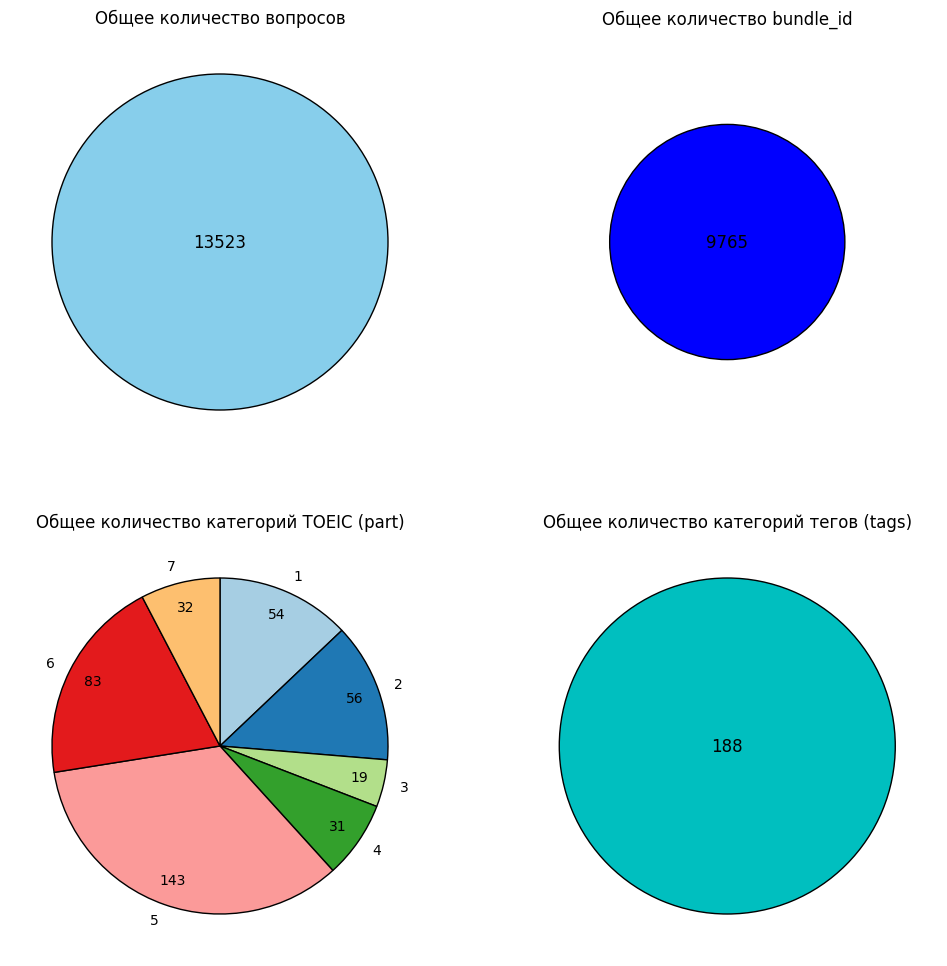

In [198]:
fix, axes = plt.subplots(2,2, figsize=(12, 12))
axes = axes.flatten()

axes[0].pie([1], colors=['skyblue'], wedgeprops=wedgeprops)
axes[0].set_title('Общее количество вопросов')
axes[0].text(0, 0, unique_questions, horizontalalignment='center', verticalalignment='center', fontsize=12)

axes[1].pie([1], colors = ['blue'], wedgeprops=wedgeprops, radius=0.7)
axes[1].set_title('Общее количество bundle_id')
axes[1].text(0, 0, unique_bundle, horizontalalignment = 'center', va = 'center', fontsize = 12)

wedges, texts, autotexts = axes[2].pie(
    part_counts.values,
    labels=part_counts.index,  # Категории (номера) будут отображаться снаружи
    startangle=90,
    colors=colors,
    counterclock=False,
    wedgeprops=wedgeprops,
    autopct='%1.1f%%',  # Включаем отображение процентного значения
    pctdistance=0.85  # Расстояние для процента
)
# Добавление значений внутрь сегментов
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{part_counts.values[i]}')  # Установка значения внутри сегмента
axes[2].set_title('Общее количество категорий TOEIC (part)')

axes[3].pie([1], colors='coralred', wedgeprops=wedgeprops)
axes[3].set_title('Общее количество категорий тегов (tags)')
axes[3].text(0, 0, unique_tags, horizontalalignment='center', verticalalignment='center', fontsize=12)


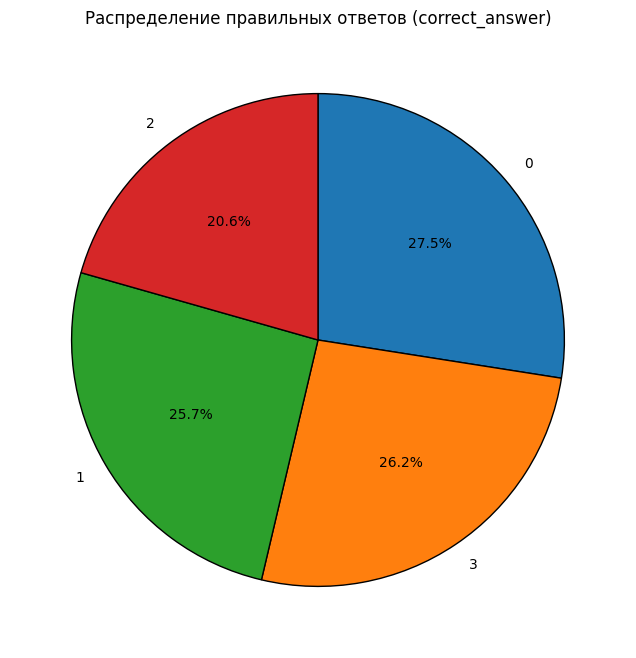

In [204]:
# Построение круговой диаграммы для распределения правильных ответов
plt.figure(figsize=(8, 8))
plt.pie(all_correct_answer.values, labels=all_correct_answer.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Распределение правильных ответов (correct_answer)')
plt.show()

## Пользовательский опыт

In [213]:
# Определение типов данных для оптимизации памяти
dtypes = {
    'row_id': 'int32',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'boolean'
}

# Задаем размер куска, например 1 миллион строк
chunksize = 10**6

# Множество для хранения уникальных user_id
unique_users = set()

# Чтение файла по частям и добавление уникальных user_id
for chunk in pd.read_csv('./train_part_0.csv', dtype=dtypes, chunksize=chunksize):
    unique_users.update(chunk['user_id'].unique())

# Подсчет общего количества уникальных пользователей
print(f'Количество уникальных пользователей: {len(unique_users)}')

Количество уникальных пользователей: 349


In [2]:
import pandas as pd

# Загрузка всей выборки данных
data = pd.read_csv('./train_part_0.csv')

# Среднее время на ответ для каждого пользователя
average_time_per_user = data.groupby('user_id')['prior_question_elapsed_time'].mean()

# Частота правильных ответов для каждого пользователя
questions_only = data[data['answered_correctly'] != -1]
correct_answers_count = questions_only[questions_only['answered_correctly'] == 1].groupby('user_id')['answered_correctly'].count()

# Общее количество ответов для каждого пользователя
total_answers_count = questions_only.groupby('user_id')['answered_correctly'].count()

# Процент правильных ответов для каждого пользователя
correctness_per_user = (correct_answers_count / total_answers_count).fillna(0)

# Сортировка пользователей по количеству правильных ответов и выбор топ-10
top_10_users = correct_answers_count.sort_values(ascending=False).head(10)

# Создание таблицы DataFrame с дополнительной информацией
top_10_users_df = pd.DataFrame({
    'correct_answers_count': top_10_users.values,
    'total_answers_count': total_answers_count.loc[top_10_users.index],
    'correctness_percentage': (correct_answers_count.loc[top_10_users.index] / total_answers_count.loc[top_10_users.index]) * 100
})

# Вывод таблицы в Jupyter
display(top_10_users_df)


# Количество лекций на пользователя
lectures_viewed_per_user = data[data['content_type_id'] == 1].groupby('user_id')['content_id'].count()

# Влияние лекций на правильность ответов
correctness_after_lecture = data[(data['prior_question_had_explanation'] == True) & (data['answered_correctly'] != -1)]['answered_correctly'].mean()

# Частота правильных ответов до лекций
correctness_before_lecture = data[(data['prior_question_had_explanation'] == False) & (data['answered_correctly'] != -1)]['answered_correctly'].mean()

# Связь между временем ответа и правильностью
time_vs_correctness_df = data[data['answered_correctly'] != -1][['prior_question_elapsed_time', 'answered_correctly']]
time_vs_correctness_grouped = time_vs_correctness_df.groupby('prior_question_elapsed_time')['answered_correctly'].mean()

# Общее время, проведенное пользователем за обучением
total_study_time_per_user = data.groupby('user_id')['prior_question_elapsed_time'].sum()

# Среднее количество вопросов в группе для каждого пользователя
questions_per_group_per_user = data[data['content_type_id'] == 0].groupby(['user_id', 'task_container_id']).size().groupby('user_id').mean()

# Среднее количество вопросов для одного пользователя
questions_per_user = data[data['content_type_id'] == 0].groupby('user_id').size()

# Среднее время на ответ
average_time_overall = average_time_per_user.mean()
print(f'Среднее время на ответ: {average_time_overall:.2f} миллисекунд')

# Среднее количество лекций на пользователя
average_lectures_viewed = lectures_viewed_per_user.mean()
print(f'Среднее количество лекций на пользователя: {average_lectures_viewed:.2f}')

# Частота правильных ответов
correctness_overall = correctness_per_user.mean()
print(f'Средний процент правильных ответов: {correctness_overall * 100:.2f}%')

# Средний процент правильных ответов без лекций
print(f'Средний процент правильных ответов без лекций: {correctness_before_lecture * 100:.2f}%')

# Влияние лекций на правильность ответов
print(f'Средний процент правильных ответов после лекций: {correctness_after_lecture * 100:.2f}%')

# Среднее общее время, проведенное пользователем за обучением
average_study_time = total_study_time_per_user.mean()
print(f'Среднее общее время, проведенное пользователем за обучением: {average_study_time:.2f} миллисекунд')

# Среднее количество вопросов в группе для пользователя
average_questions_per_group = questions_per_group_per_user.mean()
print(f'Среднее количество вопросов в группе для пользователя: {average_questions_per_group:.2f}')

# Среднее количество вопросов для одного пользователя
average_questions_per_user_value = questions_per_user.mean()
print(f'Среднее количество вопросов для одного пользователя: {average_questions_per_user_value:.2f}')

# Максимальное и минимальное количество вопросов для одного пользователя
max_questions_per_user = questions_per_user.max()
min_questions_per_user = questions_per_user.min()
print(f'Максимальное количество вопросов для одного пользователя: {max_questions_per_user}')
print(f'Минимальное количество вопросов для одного пользователя: {min_questions_per_user}')

# Пользователь с лучшим результатом
best_user_id = correctness_per_user.idxmax()
print(f'Пользователь с лучшим результатом (максимальный процент правильных ответов): user_id {best_user_id}')

# Количество вопросов пользователя с лучшим результатом
best_user_questions_count = questions_per_user.get(best_user_id, 0)
print(f'Количество вопросов пользователя с лучшим результатом: {best_user_questions_count}')


,correct_answers_count,total_answers_count,correctness_percentage
user_id,,,
1283420,6196,7476,82.878545
24418,4337,6283,69.027535
1440282,4324,5620,76.939502
1282581,4024,4993,80.592830
2041025,2975,4343,68.501036
1864702,2824,4164,67.819404
1084314,1864,2471,75.435047
220268,1665,2292,72.643979
107002,1587,1928,82.313278


Среднее время на ответ: 23866.38 миллисекунд
Среднее количество лекций на пользователя: 12.62
Средний процент правильных ответов: 54.64%
Средний процент правильных ответов без лекций: 48.48%
Средний процент правильных ответов после лекций: 70.25%
Среднее общее время, проведенное пользователем за обучением: 6928382.38 миллисекунд
Среднее количество вопросов в группе для пользователя: 1.29
Среднее количество вопросов для одного пользователя: 281.32
Максимальное количество вопросов для одного пользователя: 7476
Минимальное количество вопросов для одного пользователя: 1
Пользователь с лучшим результатом (максимальный процент правильных ответов): user_id 1880240
Количество вопросов пользователя с лучшим результатом: 1
